In [ ]:
# Dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [2]:
# create engine to hawaii.sqlite
database_path = 'Resources/hawaii.sqlite'
engine = create_engine(f"sqlite:///{database_path}")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19bf82994a8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [45]:
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [42]:
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [89]:
prcp_year = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= year_ago).\
group_by(func.strftime("%m", Measurement.date)).order_by(Measurement.date.desc()).all()
prcp_df = pd.DataFrame(prcp_year, columns=['Precipitation', 'Date'])
prcp_df.set_index('Date', inplace=True)
prcp_df.head(60)

###########################
# prcp_year = session.query((func.avg(Measurement.prcp)), Measurement.date).filter(Measurement.date >= year_ago).\
# order_by(Measurement.date).all()
# prcp_df = pd.DataFrame(prcp_year, columns=['Precipitation', 'Date'])
# # prcp_df.dropna(inplace=True)
# # prcp_df.set_index('Date', inplace=True)
# prcp_df.head(60)

,Precipitation
Date,
2017-07-01,0.02
2017-06-01,0.00
2017-05-01,0.26
2017-04-01,0.00
2017-03-01,1.19
2017-02-01,0.00
2017-01-01,0.00
2016-12-01,0.12
2016-11-01,0.00


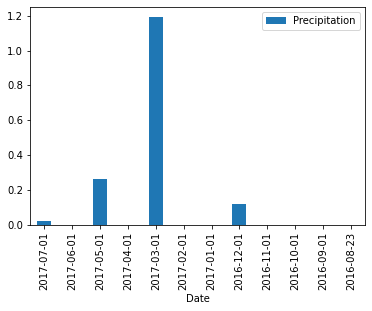

In [90]:
prcp_df.plot.bar()

In [9]:
recent_date = session.query(Station).first()
recent_date.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19bf81fcbe0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()